In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### 01 - Data Description.

column name in cleaned df | meaning 
--- | --- 
**customer** | Customer ID
**state** | US State 
**customer_lifetime_value** | CLV is the client economic value for a company during all their relationship
**response** | Response to marketing calls (customer engagement)
**coverage** | Customer coverage type
**education** | Customer education level
**effective_to_date** | Effective to date
**employmentstatus** | Customer employment status
**gender** | Customer gender
**income** | Customer income
**location_code** | Customer living zone
**marital_status:** | Customer marital status
**monthly_premium_auto:** | Monthly premium
**months_since_last_claim:** | Last customer claim
**months_since_policy_inception:** | Policy Inception
**number_of_open_complaints:** | Open claims
**number_of_policies:** | Number policies
**policy_type:** | Policy type
**policy:** | Policy
**renew_offer_type:** | Renew
**sales_channel:** | Sales channel (customer-company first contact)
**total_claim_amount:** | Claims amount
**vehicle_class:** | Vehicle class
**vehicle_size:** | Vehicle siz

**Goal: Can we predict the amount claimed by a client?**

### 02 - Getting Data

- Read `.csv` file

In [2]:
import pandas as pd                                           # panel data, handling dataframes
pd.set_option('display.max_columns', None)

In [3]:
data=pd.read_csv('marketing_customer_analysis.csv')    # import csv file
data.head()                                                    # show first 5 rows

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### 03 - Cleaning/Wrangling/EDA

In [4]:
data.shape       # dataframe dimensions

(9134, 24)

In [5]:
data.columns     # columns headers

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [6]:
data.columns=[e.lower().replace(' ', '_') for e in data.columns]   # lower and replace
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

***deal with NaNs***

In [7]:
data.info(memory_usage='deep')   # dataframe info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [8]:
data.isna().sum()     # missing values

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [9]:
# the unique customer ID doesn't provide relevant info for our prediction
data=data.drop(columns=['customer'])

In [10]:
data=data.dropna()   # drop rows with nan values

In [11]:
for c in data.columns.tolist():         # know the number of unique values for each column
    print(c, len(data[c].unique()))

state 5
customer_lifetime_value 8041
response 2
coverage 3
education 5
effective_to_date 59
employmentstatus 5
gender 2
income 5694
location_code 3
marital_status 3
monthly_premium_auto 202
months_since_last_claim 36
months_since_policy_inception 100
number_of_open_complaints 6
number_of_policies 9
policy_type 3
policy 9
renew_offer_type 4
sales_channel 4
total_claim_amount 5106
vehicle_class 6
vehicle_size 3


In [12]:
data.shape

(9134, 23)

### Categorical features

`effective_to_date`

In [13]:
data['effective_to_date'].dtype

dtype('O')

In [14]:
# convert it to datetime
data['effective_to_date']=pd.to_datetime(data['effective_to_date'])

In [15]:
# check datatype again
data['effective_to_date'].dtype

dtype('<M8[ns]')

In [16]:
# check when data begin
data['effective_to_date'].min()

Timestamp('2011-01-01 00:00:00')

In [17]:
# check when data end
data['effective_to_date'].max()


Timestamp('2011-02-28 00:00:00')

In [18]:
# we will change the effective to date column to ordinal
data['effective_to_date']=data['effective_to_date'].apply(lambda x: x.toordinal())

In [19]:
data['effective_to_date']

0       734192
1       734168
2       734187
3       734157
4       734171
         ...  
9129    734178
9130    734180
9131    734174
9132    734171
9133    734182
Name: effective_to_date, Length: 9134, dtype: int64

**Values for each class in categorical features**

In [20]:
# single out categorical columns
cat_cols=[col for col in data.columns if (data[col].dtype==object)]     # categorical columns

In [21]:
# writing some code to have a nicer output over all categorical features

print('Categorical Features:', len(cat_cols))
print('----------')
for c in cat_cols:
    print('Name: {}'.format(data[c].name))    # column name
    print('Type: {}'.format(data[c].dtype))   # column type
    print('Unique values: {}'.format(len(data[c].unique())))   # column unique values
    print(data[c].unique())
    print(((data[c].value_counts()/ sum(data[c].value_counts()))*100))   # percentage
    print('\n----------')

Categorical Features: 14
----------
Name: state
Type: object
Unique values: 5
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
California    34.486534
Oregon        28.476024
Arizona       18.644624
Nevada         9.656229
Washington     8.736589
Name: state, dtype: float64

----------
Name: response
Type: object
Unique values: 2
['No' 'Yes']
No     85.679877
Yes    14.320123
Name: response, dtype: float64

----------
Name: coverage
Type: object
Unique values: 3
['Basic' 'Extended' 'Premium']
Basic       60.959054
Extended    30.019707
Premium      9.021239
Name: coverage, dtype: float64

----------
Name: education
Type: object
Unique values: 5
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Bachelor                30.085395
College                 29.351872
High School or Below    28.705934
Master                   8.112547
Doctor                   3.744252
Name: education, dtype: float64

----------
Name: employmentstatus
Type: object
Unique values: 5
['Employe

**Numerical columns**

In [22]:
data.describe()     # stats

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,734166.837749,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,16.942769,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,734138.000000,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,734152.000000,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,734166.000000,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,734181.000000,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,734196.000000,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [23]:
# Singleing out numerical columns
num_cols=[c for c in data.columns if (data[c].dtype!='object') and (c!='effective_to_date')]   # numerical columns

In [24]:
num_cols

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount']

### Exploration (EDA)

**barplot for each categorical variable**

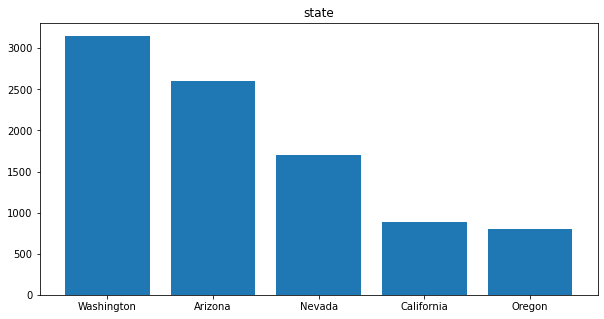

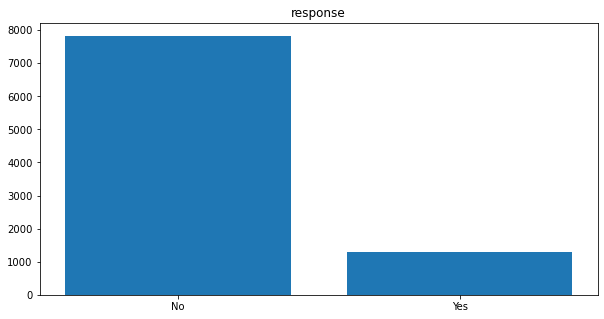

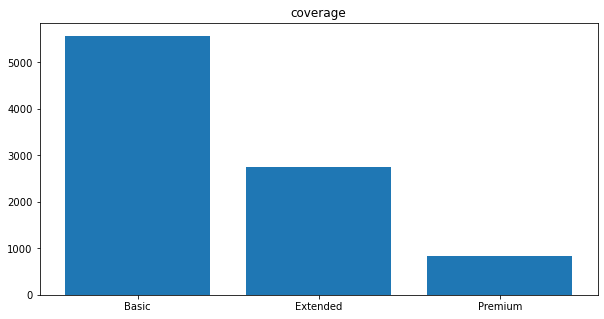

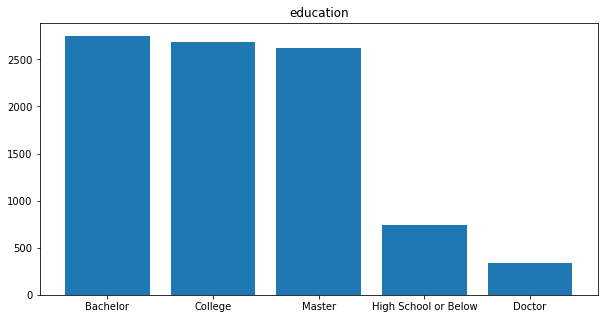

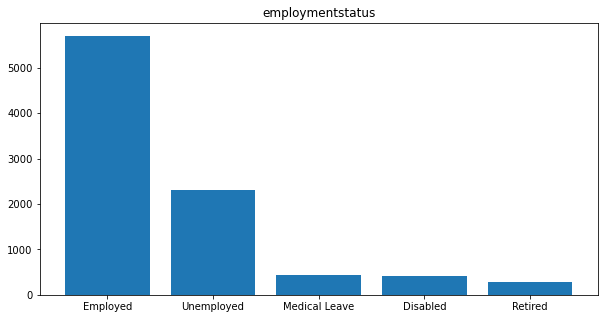

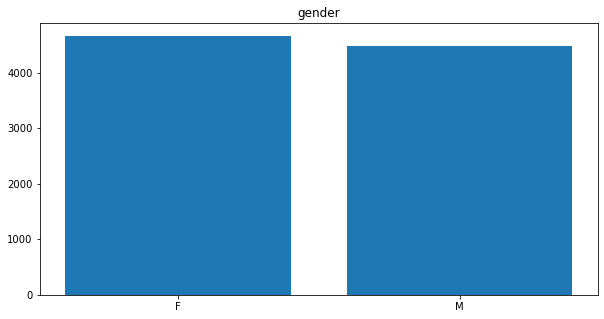

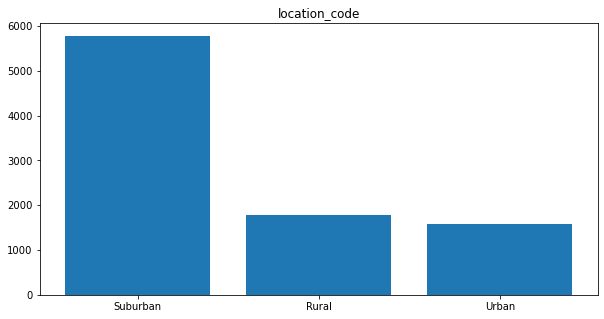

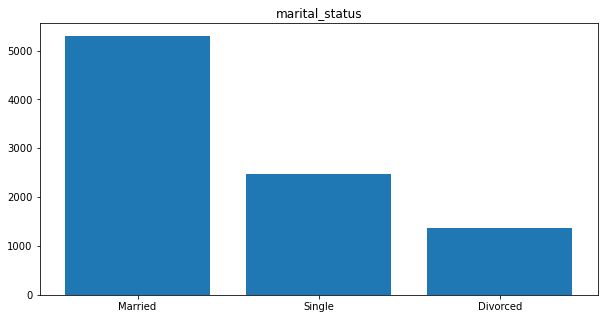

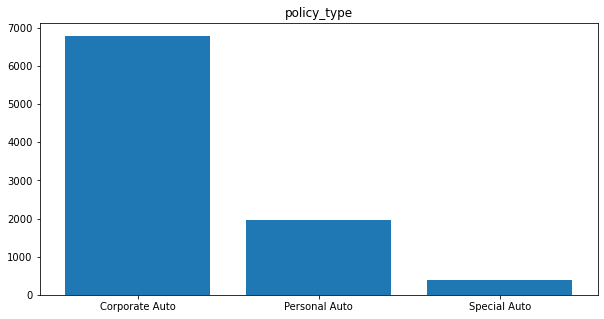

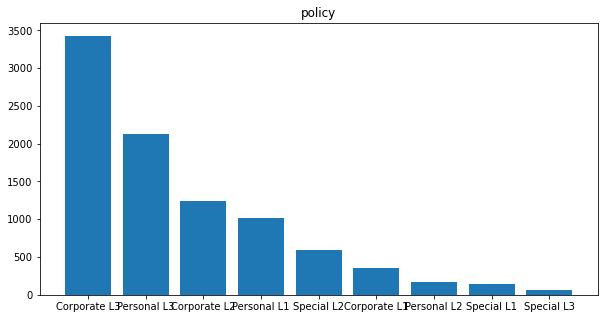

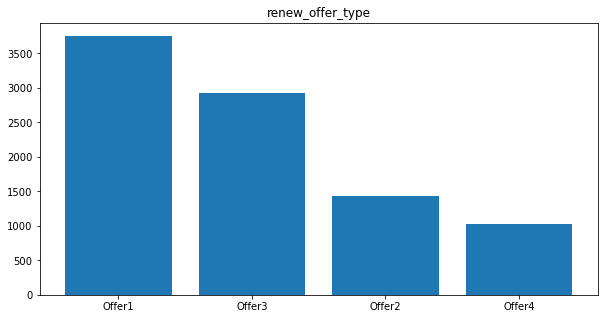

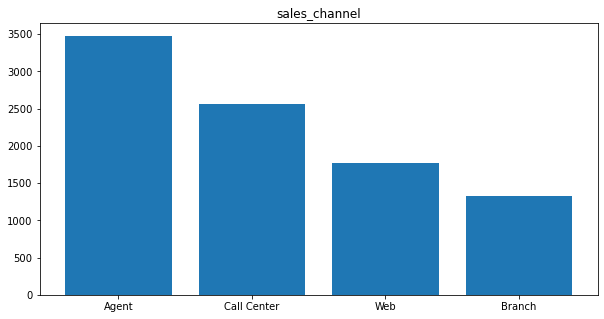

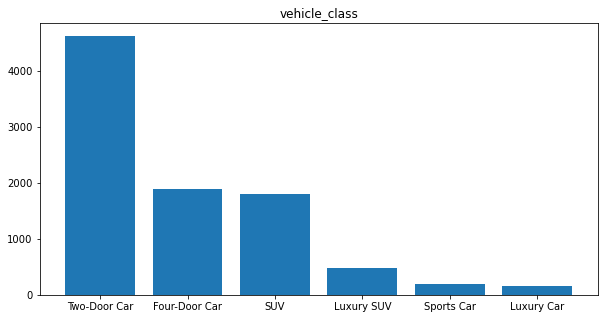

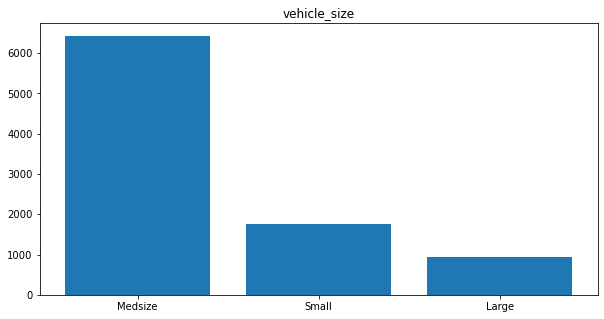

In [25]:
import matplotlib.pyplot as plt

# These plots don't have to be nice (you wouldn't present them),
# they're just to get an overview
for c in cat_cols:
    plt.figure(figsize=(10,5))
    plt.bar(data[c].unique(), data[c].value_counts())
    plt.title(c)
    plt.show();

### Show plot of the total number of responses

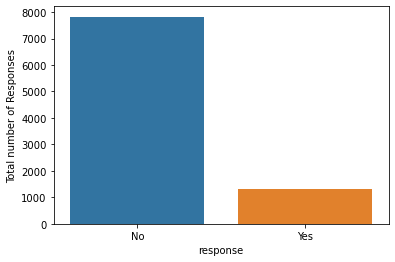

In [26]:
sns.countplot(x = 'response', data=data)
plt.ylabel('Total number of Responses')
plt.show()

### Show a plot of the response rate by the sales channel.

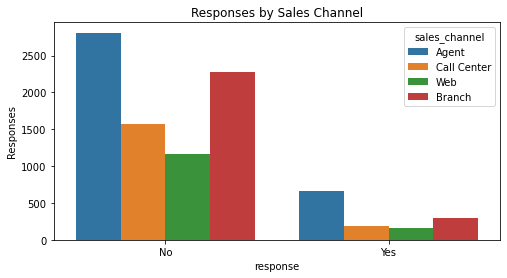

In [27]:
plt.figure(figsize=(8,4))
sns.countplot(x='response', hue='sales_channel', data=data)
plt.ylabel('Responses')
plt.title('Responses by Sales Channel')
plt.show()

### Show a plot of the distribution of the total claim amount, broken down by response kind. Try a boxplot and distribution plot, for each response kind. For the distribution plot, try to plot both kinds of responses in one chart (seaborns histplot, using the 'hue' parameter).

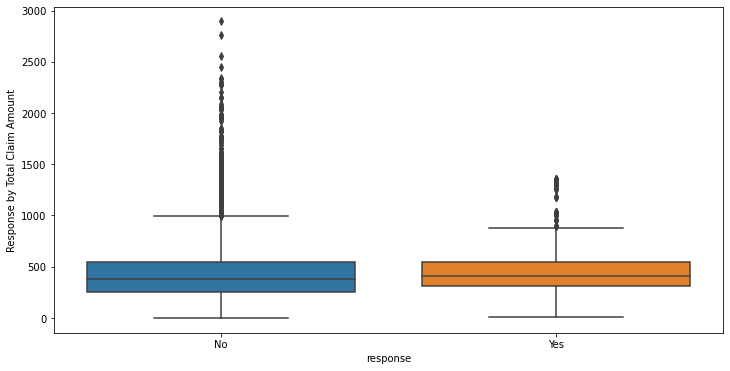

In [28]:
plt.figure(figsize=(12,6))
sns.boxplot(y='total_claim_amount' , x='response', data=data)
plt.ylabel('Response by Total Claim Amount')
plt.show()

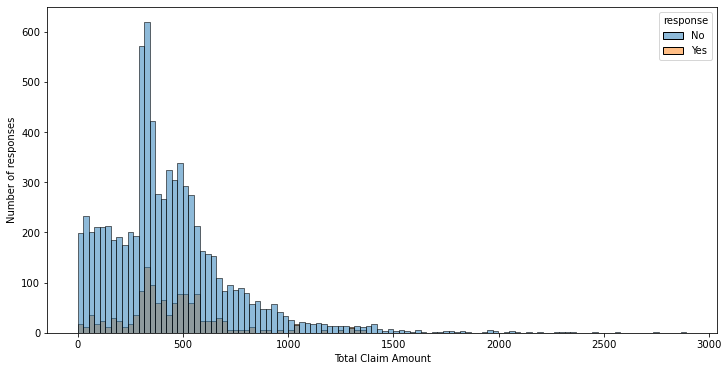

In [29]:
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x='total_claim_amount' , hue='response', data=data, ax=ax)
plt.ylabel('Number of responses')
plt.xlabel('Total Claim Amount')
plt.show()

### Create similar plots like in the task before, but for `income`

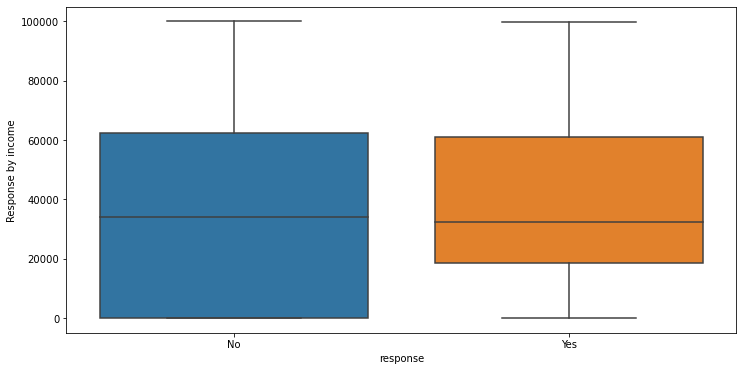

In [30]:
plt.figure(figsize=(12,6))
sns.boxplot(y='income' , x='response', data=data)
plt.ylabel('Response by income')
plt.show()

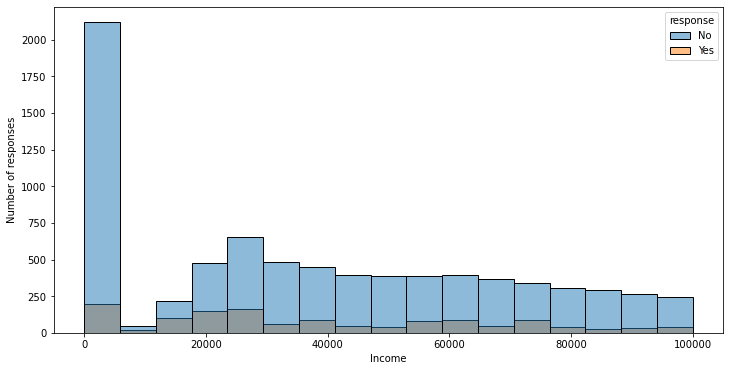

In [31]:
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x='income' , hue='response', data=data, ax=ax)
plt.ylabel('Number of responses')
plt.xlabel('Income')
plt.show()

### Create a scatterplot between 'total claim amount' and 'income'. Play around with the settings of the scatterplot (markersize?) and try to identify more features within the data just visually. You can also try different seaborn plots. Check: https://www.python-graph-gallery.com/134-how-to-avoid-overplotting-with-python

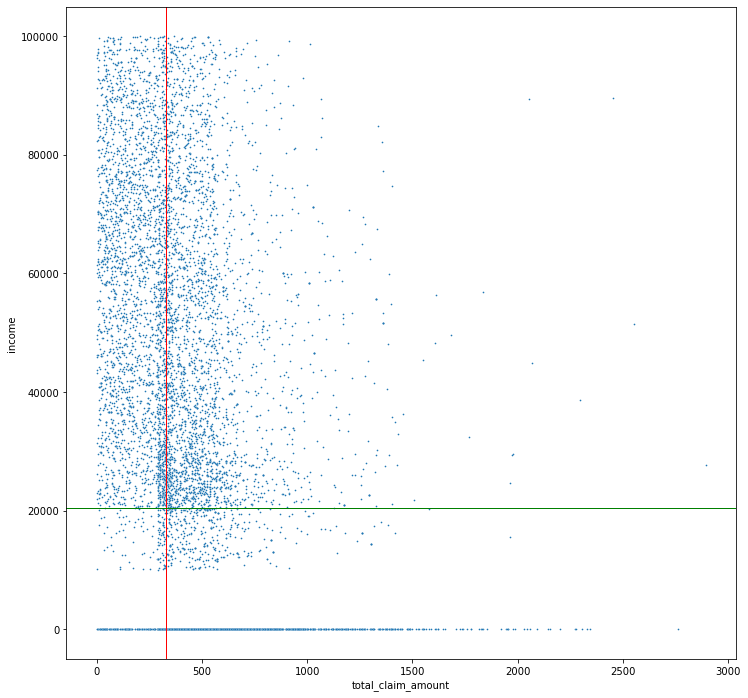

In [32]:
fig, ax = plt.subplots(figsize=(12,12))
sns.scatterplot(data=data,
                x='total_claim_amount',
                y='income',
                s=3,
                ax=ax,
               )
plt.axvline(x=330, linewidth=1, color='r')
plt.axhline(y=20500, linewidth=1, color='g')

# Customer Analysis Round 4

### get numeric data

In [33]:
# most handy approach
numericals =data._get_numeric_data()

# but what also works:
# numericals =data.select_dtypes(np.number)

# show the first 5 rows
numericals.head()

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,734192,56274,69,32,5,0,1,384.811147
1,6979.535903,734168,0,94,13,42,0,8,1131.464935
2,12887.431650,734187,48767,108,18,38,0,2,566.472247
3,7645.861827,734157,0,106,18,65,0,7,529.881344
4,2813.692575,734171,43836,73,12,44,0,1,138.130879


### get the categoricals

In [34]:
categoricals = data.select_dtypes(np.object)
categoricals.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### check normality visually

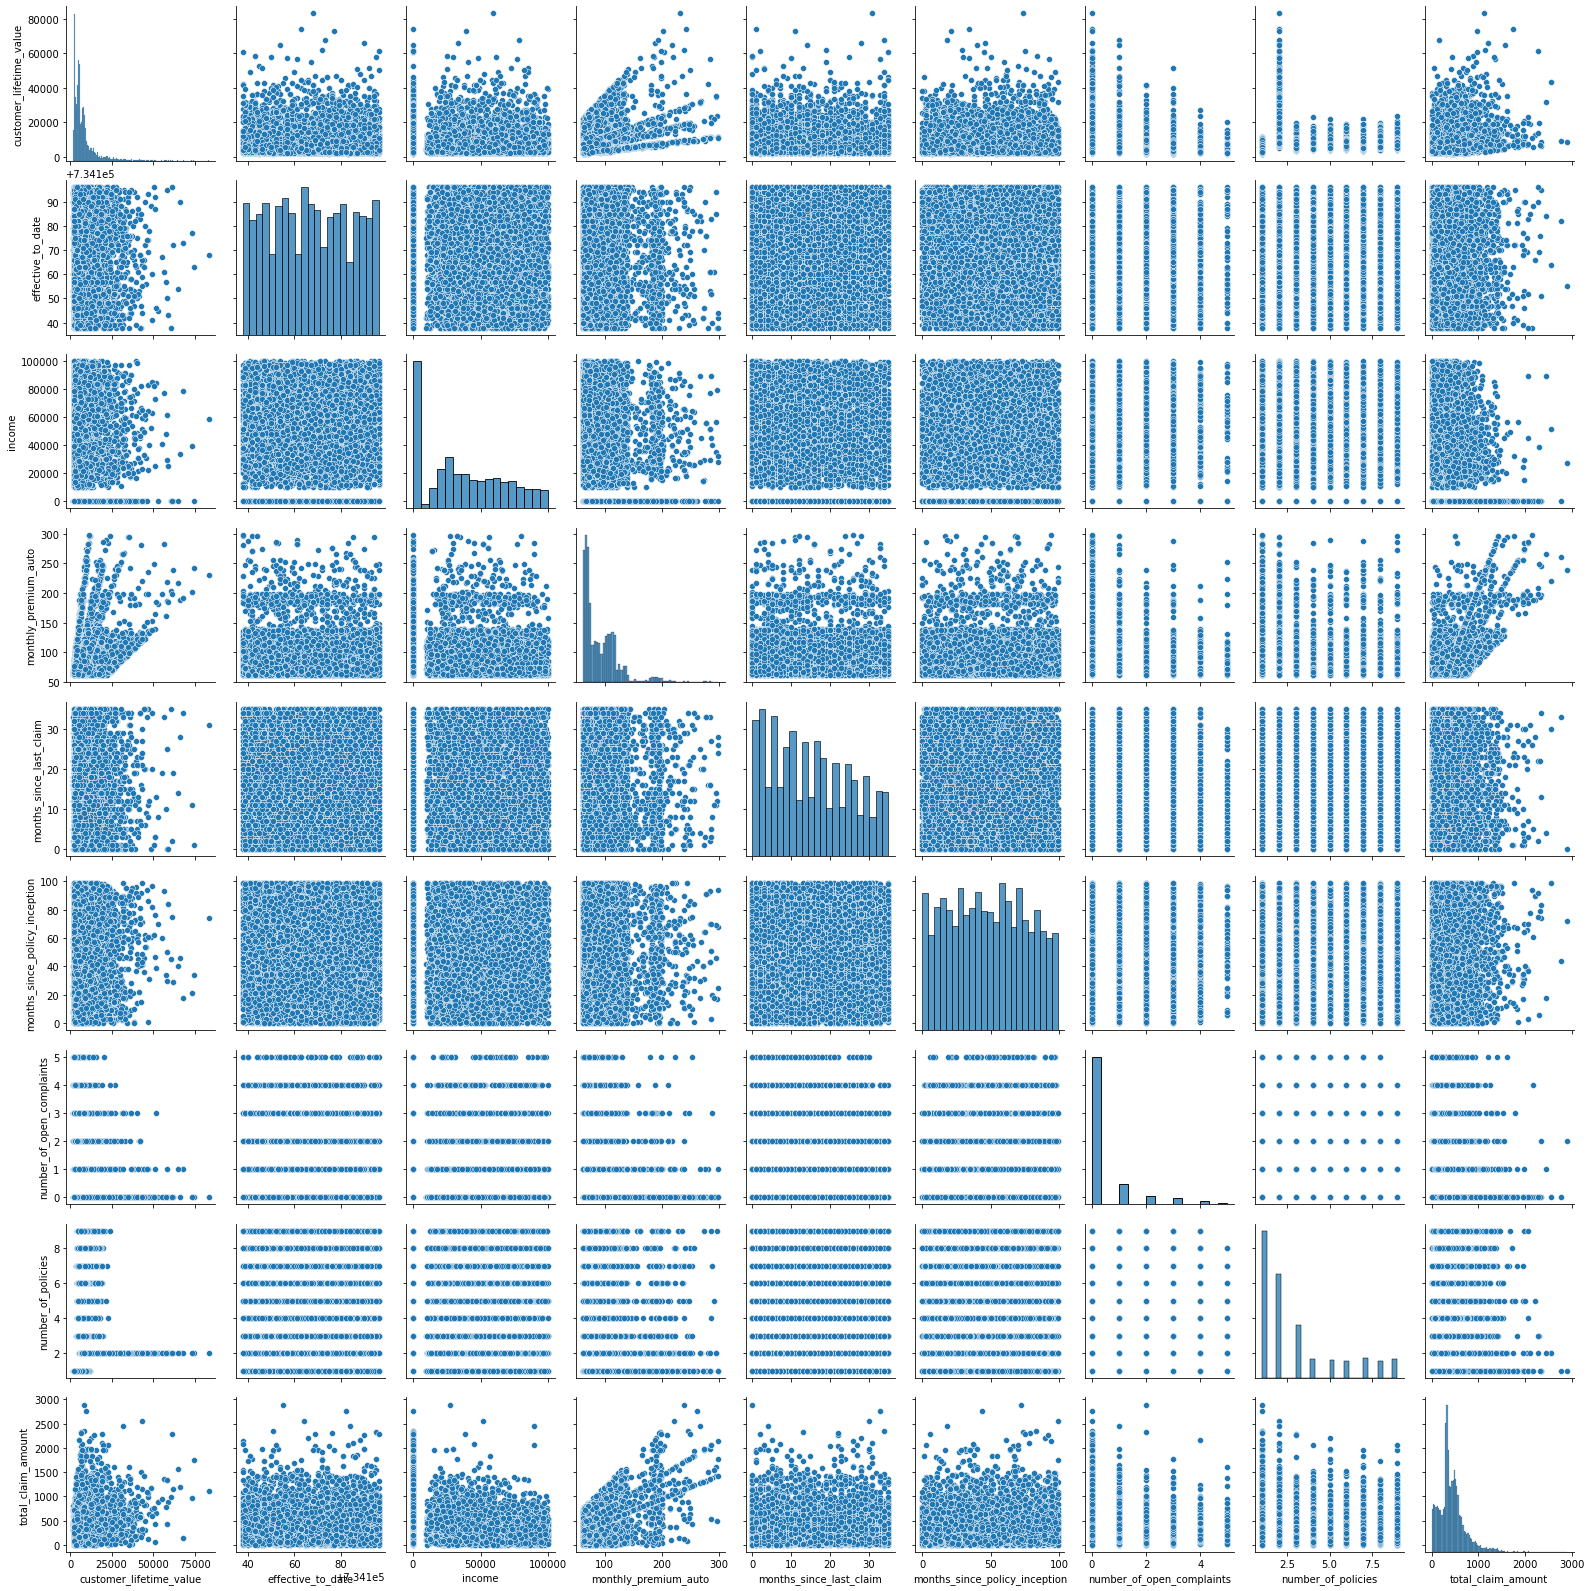

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# THIS CAN TAKE SOME TIME because it generates scatterplots pairwise between the variables
# so for n columns, expect n^2 plots. Depending on how fast your computer is, you may want to avoid this plot
# when it comes to > 10 numerical columns.

sns.pairplot(numericals)

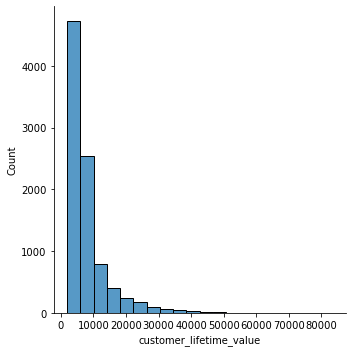

In [36]:
sns.displot(data['customer_lifetime_value'], bins=20)

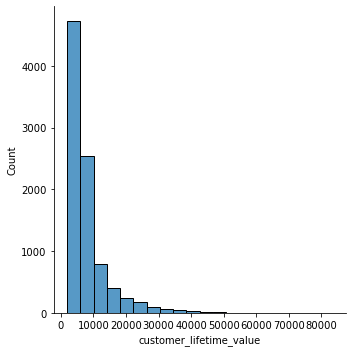

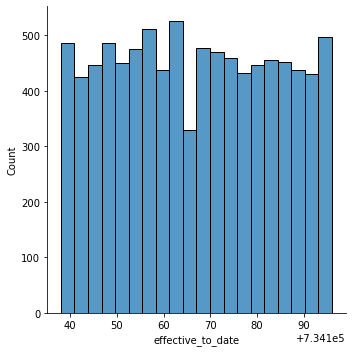

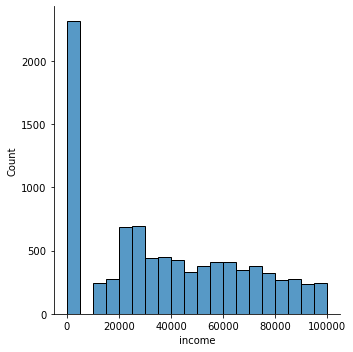

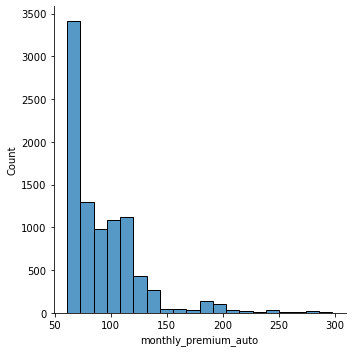

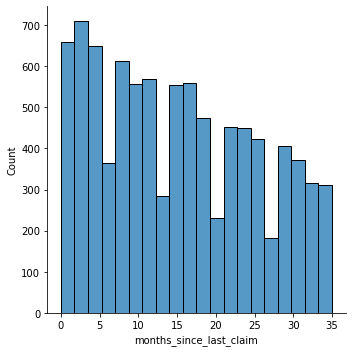

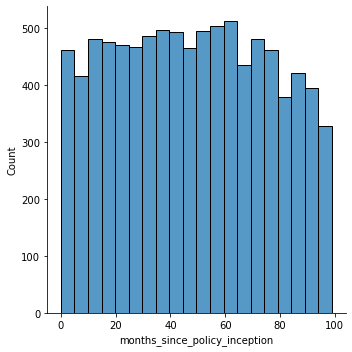

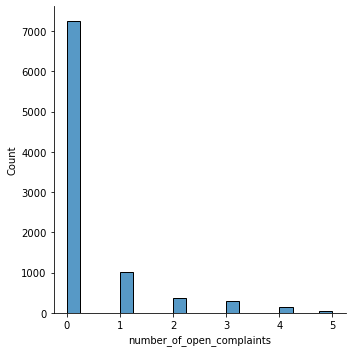

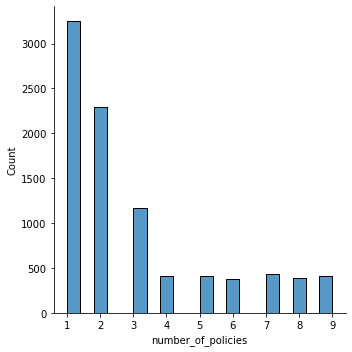

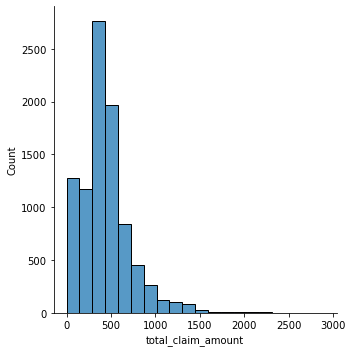

In [37]:
for col in numericals.columns:
    sns.displot(numericals[col], bins=20)
    plt.show()

### Check for multicolinearity

In [38]:
correlations = numericals.corr()
print(correlations)

                               customer_lifetime_value  effective_to_date  \
customer_lifetime_value                       1.000000          -0.004844   
effective_to_date                            -0.004844           1.000000   
income                                        0.024366          -0.016395   
monthly_premium_auto                          0.396262           0.004793   
months_since_last_claim                       0.011517          -0.007125   
months_since_policy_inception                 0.009418           0.001300   
number_of_open_complaints                    -0.036343           0.007153   
number_of_policies                            0.021955           0.010620   
total_claim_amount                            0.226451           0.003308   

                                 income  monthly_premium_auto  \
customer_lifetime_value        0.024366              0.396262   
effective_to_date             -0.016395              0.004793   
income                         1.0

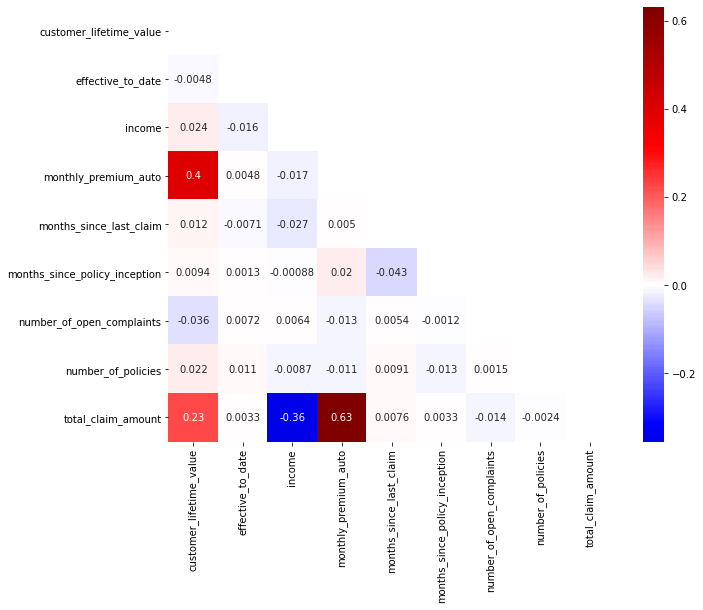

In [39]:
fig, ax = plt.subplots(figsize=(10, 8))

mask=np.zeros_like(numericals.corr())
mask[np.triu_indices_from(mask)]=True

sns.heatmap(numericals.corr(),  # the data for the heatmap
            mask=mask,  # "deactivates" all fields in our heatmap according to the mask
            annot=True,  # show the actual values of correlation
            cmap='seismic',  # provide the 'seismic' colormap
            center=0,  # specify the value at which to center the colormap
           )
plt.show()

# 04 - Pre-Processing Data

***dealing with outliers***

In [40]:
# e.g. 3*IQR in a column

q1=np.percentile(data['customer_lifetime_value'], 25)   # percentile 25
q3=np.percentile(data['customer_lifetime_value'], 75)   # percentile 75

iqr=q3-q1  # IQR

upper=q3+3*iqr   # upper boundary
lower=q1-3*iqr   # lower boundary

In [41]:
# how many rows would be outliers in that sense (below the threshold)?

len(data[data['customer_lifetime_value'] < lower])

0

In [42]:
# how many rows would be outliers in that sense (above the threshold)?
len(data[data['customer_lifetime_value'] > upper])

367

**normalization**

<AxesSubplot:>

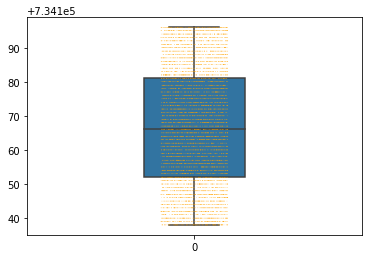

In [43]:
# min-max-scaler
# plot before scaling:
fig, ax = plt.subplots()
sns.boxplot(data=data['effective_to_date'], width=.3)
sns.stripplot(data=data['effective_to_date'], color="orange", jitter=0.1, size=.5, ax=ax)

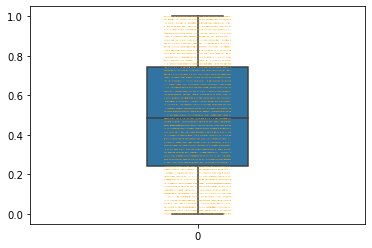

In [44]:
from sklearn.preprocessing import MinMaxScaler

data['effective_to_date']=MinMaxScaler().fit_transform(data['effective_to_date'].values.reshape(-1, 1))

# plot after scaling
fig, ax = plt.subplots()
sns.boxplot(data=data['effective_to_date'], width=.3)
sns.stripplot(data=data['effective_to_date'], color="orange", jitter=0.1, size=.5, ax=ax);

In [45]:
data['effective_to_date'].head()

0    0.931034
1    0.517241
2    0.844828
3    0.327586
4    0.568966
Name: effective_to_date, dtype: float64

**standardize**

In [46]:
from sklearn.preprocessing import StandardScaler
num_cols

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount']

In [47]:
for c in num_cols[:-1]:   # we'll normalize all except the target column
    data[c]=StandardScaler().fit_transform(data[c].values.reshape(-1, 1))

In [48]:
data.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,-0.762878,No,Basic,Bachelor,0.931034,Employed,F,0.612827,Suburban,Married,-0.703925,1.678099,-1.543287,-0.42225,-0.822648,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,-0.149245,No,Extended,Bachelor,0.517241,Unemployed,F,-1.239617,Suburban,Single,0.022691,-0.208186,-0.217334,-0.42225,2.106160,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,0.710636,No,Premium,Bachelor,0.844828,Employed,F,0.365710,Suburban,Married,0.429596,0.288205,-0.360680,-0.42225,-0.404247,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,-0.052263,No,Basic,Bachelor,0.327586,Unemployed,M,-1.239617,Suburban,Married,0.371467,0.288205,0.606907,-0.42225,1.687759,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,-0.755575,No,Basic,Bachelor,0.568966,Employed,M,0.203390,Rural,Single,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


**Encoding Categorical Data**

In [49]:
one_hot_data=pd.get_dummies(data[cat_cols], drop_first=True)   # one hot encoding categorical variables

one_hot_data.head()

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


**Concat numerical and categorical DataFrames**

In [50]:
data=pd.concat([data, one_hot_data], axis=1)   # concat dataframes
data.drop(columns=cat_cols, inplace=True)
data.head()

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,-0.762878,0.931034,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648,384.811147,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,-0.149245,0.517241,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160,1131.464935,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0.710636,0.844828,0.365710,0.429596,0.288205,-0.360680,-0.42225,-0.404247,566.472247,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,-0.052263,0.327586,-1.239617,0.371467,0.288205,0.606907,-0.42225,1.687759,529.881344,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,-0.755575,0.568966,0.203390,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648,138.130879,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


**Splitting into train set and test set**

In [51]:
# first, split X-y (learning-target data)
X = data.drop(columns=['total_claim_amount'])
y = data['total_claim_amount']

In [52]:
# checking shape
print(X.shape)
print(y.shape)

(9134, 51)
(9134,)


In [53]:
# train_test_split
from sklearn.model_selection import train_test_split as tts

# train-test-split (4 sets)
X_train, X_test, y_train, y_test=tts(X, y, test_size=0.2, random_state=42)  # random state fixed sample

# 05 - Modelling

We have now the data prepared for the regression problem.

**Linear Regression**

In [54]:
from sklearn.linear_model import LinearRegression as LinReg

# create an (untrained) model "instance"
linreg=LinReg()    

# train the model
linreg.fit(X_train, y_train)

# predict target data from test features , that the model has never seen
y_pred_linreg=linreg.predict(X_test)

# 06 - Model Validation

In [55]:
models=[linreg,
        # add more models here
       ]
model_names=['linreg',
             # add more model strings here
            ]
preds=[y_pred_linreg,
       # add more predicted labels here
      ]

***R2***

In [56]:
# this for loop is actually not necessary when only 1 model is used.
for i in range(len(models)):

    train_score=models[i].score(X_train, y_train) #R2
    test_score=models[i].score(X_test, y_test)

    print ('Model: {}, train R2: {} -- test R2: {}'.format(model_names[i], train_score, test_score))

Model: linreg, train R2: 0.7743071533051843 -- test R2: 0.7626410023961918


* According to this R² of around **0.77**, our model performs reasonably well
* Check the documentation, for what is calculated here:

*The coefficient R² is defined as (1 - u/v), where u is the **residual sum of squares** ((y_true - y_pred) ** 2).sum() and v is the **total sum of squares** ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y (means: the mean), disregarding the input features, would get a R^2 score of 0.0.*

So the formula is:

$$R^{2} = 1 - \frac{\sum_{i} (y_\text{true, i} - y_\text{pred. i})^2}{\sum_{i} (y_\text{true, i} - \bar{y}_\text{true. i})^2}$$

`i`: index of observation or the row of the dataset.

If your model predicts better, most of the predicted labels are close enough to their `i`-th true counterpart, the numerator in that fraction becomes smaller and smaller, compared to that denominator (that just predicts the mean), making the fraction smaller and smaller. If you substract a fraction from 1 that gets smaller, the resulting number will grow close to 1.

 

<div class="alert alert-block alert-success"><b>Main takeaway:</b> The R² always compares our model (or better: the sum of squared errors of truth and prediction) with a model that bluntly predicts the mean of y (or better: the sum of squared errors of truth and mean). The latter is obviously not such a smart model, but nevertheless it's an excellent benchmark for the "lower" end. </div>

We will plot `y_true` vs. `y_predicted`. For an **ideal** model, these dots will form a **line**.

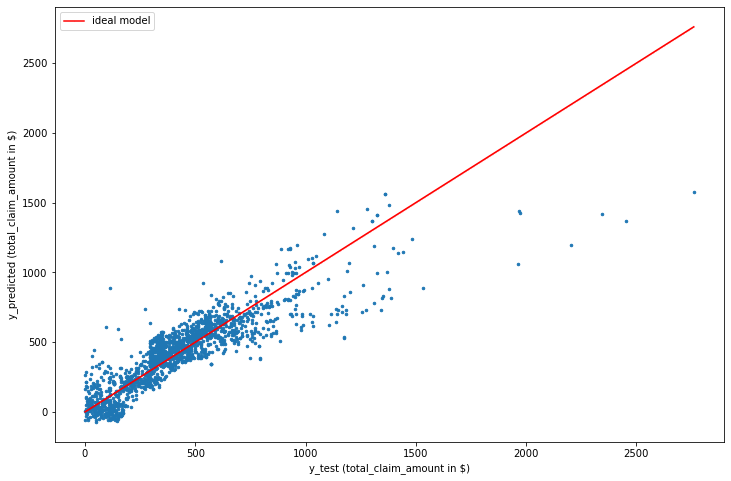

In [72]:
# generating value pairs for an ideal model
# which predicts the exact same y-value for a given test-y-value
line_x = line_y = np.linspace(min(y_test), max(y_test), num=len(y_test))

fig, ax = plt.subplots(figsize=(12,8))
plt.plot(y_test, y_pred_linreg, ms=5, marker=".", ls='')

# plot the ideal model together with our dots
plt.plot(line_x, line_y, ms=0.1, marker=".", ls='-', c='r', label='ideal model')

# show legend
plt.legend();

plt.xlabel('y_test (total_claim_amount in $)');
plt.ylabel('y_predicted (total_claim_amount in $)');


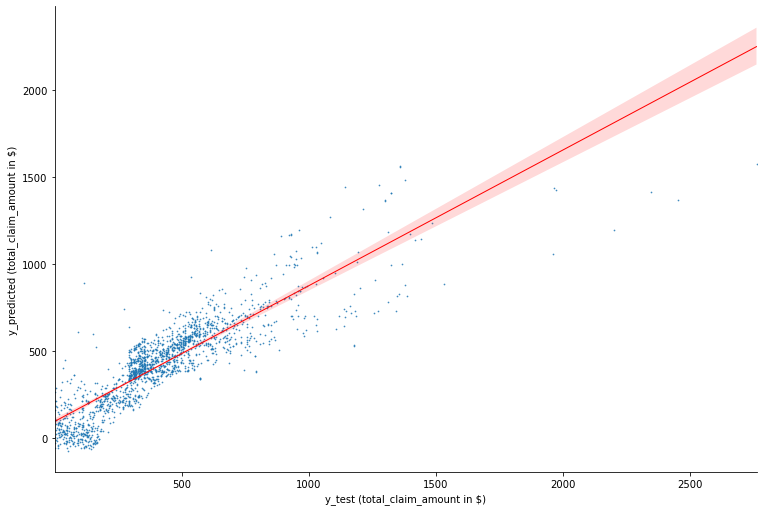

In [87]:
# or easier, with sns.lmplot(). seaborn likes to be fed a dataframe
# so we create one from our y_test and y_pred
df_y = pd.DataFrame({'y_test':y_test, 'y_predicted':y_pred_linreg})

sns.lmplot(x='y_test',
           y='y_predicted',
           data=df_y,
           markers='.',
           line_kws={'color': 'red', 'lw':1},
           scatter_kws={'alpha':.8, 's':2},
           height=7,
           aspect=12/8,
          );
plt.xlabel('y_test (total_claim_amount in $)');
plt.ylabel('y_predicted (total_claim_amount in $)');

We can see that we have quite a few outliers towards higher values of `y` (say, above y=1000), but the bulk of the  comparisons (below y=1000) scatter around the perfect fitting, contributing to the relatively good score.

A good indicator if our data let themselves fit with a linear model is also a **histogram**-plot of the **residuals**. Whenever a linear regression is justified, the residualy scatter uniformly around the ideal model line, they would even be **normally distributed**. Let's check that

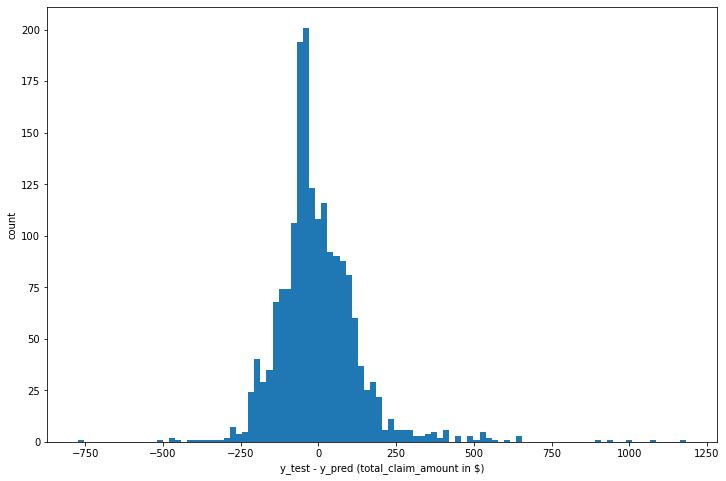

In [89]:
fig, ax = plt.subplots(figsize=(12,8))
plt.hist(y_test-y_pred_linreg, bins = 100);
plt.xlabel('y_test - y_pred (total_claim_amount in $)');
plt.ylabel('count');

We could fit a curve for a normal distribution here around the center, using the same standard deviation as our data, but the normality of this is already pretty obvious, strengthening our assumptions for linearity before modelling.

For the sake of completeness, let's calculate some more Errors...

**Mean Squared Error (MSE)**

In [60]:
from sklearn.metrics import mean_squared_error as mse

for i in range(len(models)):

    train_mse=mse(models[i].predict(X_train), y_train) #MSE
    test_mse=mse(preds[i], y_test)

    print ('Model: {}, train MSE: {} -- test MSE: {}'.format(model_names[i], train_mse, test_mse))

Model: linreg, train MSE: 19308.39422399765 -- test MSE: 18872.660935257292


**Root Mean Squared Error (RMSE)**

In [61]:
for i in range(len(models)):

    train_rmse=mse(models[i].predict(X_train), y_train)**0.5 #RMSE
    test_rmse=mse(preds[i], y_test)**0.5

    print ('Model: {}, train RMSE: {} -- test RMSE: {}'.format(model_names[i], train_rmse, test_rmse))

Model: linreg, train RMSE: 138.95464808345798 -- test RMSE: 137.37780364839617


**Mean Average Error (MAE)**

In [62]:
from sklearn.metrics import mean_absolute_error as mae
for i in range(len(models)):
    train_mae=mae(models[i].predict(X_train), y_train) #MAE
    test_mae=mae(preds[i], y_test)

    print ('Model: {}, train MAE: {} -- test MAE: {}'.format(model_names[i], train_mae, test_mae))

Model: linreg, train MAE: 95.20813765725701 -- test MAE: 94.54575948996762


# 07 - Reporting

- Present results.

**Data Level**

- Do not drop outliers because they are just a few!

**Problem Level**

- Total claim amount has a great variance.
- We can predict the total claim amount with a 25% of error, even when R2 is high.
- We need to determine though which are the significant variables (later in the bootcamp: p-value, linear regression with `statsmodels` library).
- When sure about the statistical significance of every feature (column) and also given that all the basic assumptions for a linear regression apply (normality of residuals, etc... we will talk about that more in depth later), we can provide interpretation for the coefficients that our trained linear model has determined:

the calculated coefficients `c` are stored in here:

In [65]:
models[0].coef_

array([ 8.69473579e-01, -9.02760529e-01, -8.92301304e+00,  1.74530630e+02,
        2.53144014e+00, -6.78858013e-01, -1.30402722e+00,  7.95287408e-01,
        1.54697620e+00,  5.78536260e+00, -3.00231078e+00,  3.34840115e+00,
       -2.50575899e+01, -1.28991263e+01, -6.34563618e+00, -7.22376415e+00,
       -1.87680130e+01,  7.82545617e+00, -1.02043831e+01, -8.82844485e+00,
        1.40481481e+01, -6.99843285e+00,  6.56914191e+01,  1.33385337e+01,
        3.79042026e+02,  2.20024704e+02, -7.43569587e+00,  6.25604817e+01,
       -4.13221955e+00,  1.57880225e+01, -8.72285766e+00, -6.08130485e+00,
        2.04271192e+00, -3.27799329e+00, -2.89693818e+00,  4.01458378e+01,
       -9.48581984e+00, -1.48719954e+01,  1.90340013e+01,  8.95849833e+00,
        5.91410943e+00, -6.99520991e-01, -6.01258777e+00,  2.44059042e+00,
        5.55850484e+01,  3.48677365e-01, -8.65727997e+00, -2.22492561e+01,
        4.47630024e+00, -9.87479688e+00, -3.87685086e+00])

Remember the **linear model** we used to fit our data:
$$\hat{y} = \hat{c}_{0} + \hat{c}_{1}x_{1} + \hat{c}_{2}x_{2} + \hat{c}_{3}x_{3} + \hat{c}_{4}x_{4} + \text{...} + \hat{c}_{n}x_{n} + \epsilon$$

* every summand represents one column (or sometimes **feature** or **independent variables**),
* $\hat{y}$ is our target variable (or sometimes **label**, or **dependent variable**),
* $x_{i}$ are the actual data of the $i$-th column,
* $\hat{c}_{0}$ is a constant (also sometimes called **bias** or **intercept**)
* $\epsilon$ is the error.

What is interesting for us in terms of interpretation and communicating results are the resulting coefficients, since they provide us with a quantitative estimate about how the target variable evolves depending on **one** feature, **given that all other features remain constant** (again, only given your data, and assuming that all the assumptions regarding legitimacy of linear regression are met).

So let's build a dataframe out of these to have them better visualized:

In [67]:
coeffecients = pd.DataFrame(models[0].coef_,X_train.columns)
coeffecients.columns = ['Coefficient']
coeffecients

,Coefficient
customer_lifetime_value,0.869474
effective_to_date,-0.902761
income,-8.923013
monthly_premium_auto,174.530630
months_since_last_claim,2.531440
months_since_policy_inception,-0.678858
number_of_open_complaints,-1.304027
number_of_policies,0.795287
state_California,1.546976
state_Nevada,5.785363


### Interpretation

* you can check for a good explanation of how to intepret coefficients in a linear regression model [here]("https://www.theanalysisfactor.com/interpreting-regression-coefficients/")
* One example for interpreting coefficients of **Continuous Predictor Variables**: take for example `income`. We have a coefficient here of `-8.92301`. That means:

<div class="alert alert-block alert-success"><b>Interpretion of coefficient "income":</b> given our data, and given that our data are sufficiently suitable for a linear regression model, and given that all other coeffiencients remain constant, and given that the income variable has a statistical significant impact on our target `total_claim_amount`, we can expect a decrease of 8.923 units (in this case this corresponds to \$8.923) in the target variable, if we increase the `income` by one unit (in this case this corresponds to \$1)*</div>

<div class="alert alert-block alert-danger"><b>Important</b> At this stage, it is extremely important to know in what units the values in your data are stored.</div>


* One example for interpreting Coefficients of **Categorical Predictor Variables**: take for example `gender_M`. This is a variable we have turned into `1`'s and `0`'s in the One-Hot-Encoding / dummifying process. That means "one unit increase" here just means "switching from female to male". We have a coefficient here of `13.338534`. So the correct interpretation would be 

<div class="alert alert-block alert-success"><b>Interpretion of coefficient "gender_m":</b> *given our data, and given that our data are sufficiently suitable for a linear regression model, and given that all other coefficients remain constant, and given that the gender_m variable has a statistical significant impact on our target `total_claim_amount`, we can expect an increase of 13.34 units (in this case this corresponds to \$13.34) in the target variable, if we "increase" `gender_m` by one unit (in this case this corresponds to switching from female (0) to male (1).* </div>


* You would proceed in the same manner with all the other variables, and of course not report all coefficients in a presentation, but only the most important (statistically most significant and with highest impact on the target) ones